In [2]:
from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

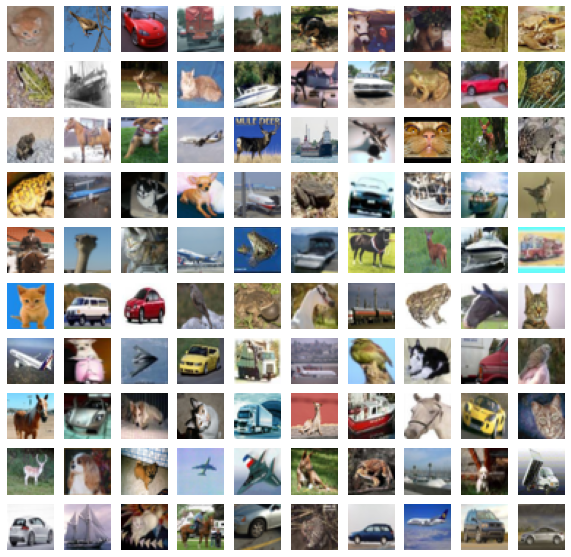

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle 

ROWS = 10

x = x_train.astype("uint8")

fig, axes1 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
    for k in range(ROWS):
        i = np.random.choice(range(len(x)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x[i:i+1][0])

In [6]:
# Training parameters
BATCH_SIZE = 32  # orig paper trained all networks with batch_size=128
EPOCHS = 200 # 200
USE_AUGMENTATION = True
NUM_CLASSES = np.unique(y_train).shape[0] # 10
COLORS = x_train.shape[3]

# Subtracting pixel mean improves accuracy
SUBTRACT_PIXEL_MEAN = True

# Model version
# Orig paper: version = 1 (ResNet v1), 
# Improved ResNet: version = 2 
# (ResNet v2)
VERSION = 1

# Computed depth from supplied model parameter n
if VERSION == 1:
    DEPTH = COLORS * 6 + 2
elif version == 2:
    DEPTH = COLORS * 9 + 2

In [7]:
# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
if SUBTRACT_PIXEL_MEAN:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = tensorflow.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tensorflow.keras.utils.to_categorical(y_test, NUM_CLASSES)

from lib import models
model = models.res_classificator(NUM_CLASSES, 32, 32)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


2022-01-12 20:59:01.553847: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-12 20:59:02.181567: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 37850 MB memory:  -> device: 0, name: A100-SXM4-40GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   896         ['main_input[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 32, 32, 32)   0           ['batch_normalization[0][0]']

/raid/USERDATA/fedore9x/venv/tf2/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
history = model.fit(x_train, y_train,
          batch_size=256,
          epochs=EPOCHS,
          validation_data=(x_test, y_test),
          shuffle=True,
          )

Epoch 1/200
196/196 [==============================] - 5s 24ms/step - loss: 0.2603 - accuracy: 0.9131 - val_loss: 0.5240 - val_accuracy: 0.8261
Epoch 2/200
196/196 [==============================] - 4s 22ms/step - loss: 0.1608 - accuracy: 0.9492 - val_loss: 0.5555 - val_accuracy: 0.8213
Epoch 3/200
196/196 [==============================] - 5s 24ms/step - loss: 0.0936 - accuracy: 0.9749 - val_loss: 0.6063 - val_accuracy: 0.8177
Epoch 4/200
196/196 [==============================] - 5s 23ms/step - loss: 0.0431 - accuracy: 0.9915 - val_loss: 0.6742 - val_accuracy: 0.8212
Epoch 5/200
196/196 [==============================] - 5s 24ms/step - loss: 0.0166 - accuracy: 0.9985 - val_loss: 0.7365 - val_accuracy: 0.8199
Epoch 6/200
196/196 [==============================] - 4s 23ms/step - loss: 0.0065 - accuracy: 0.9998 - val_loss: 0.7798 - val_accuracy: 0.8264
Epoch 7/200
196/196 [==============================] - 4s 22ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.8325 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(x_test, y_test),
          shuffle=True,
          )

Epoch 1/200
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6077 - accuracy: 0.7950 - val_loss: 0.6855 - val_accuracy: 0.7746
Epoch 2/200
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3447 - accuracy: 0.8791 - val_loss: 0.6873 - val_accuracy: 0.7796
Epoch 3/200
1563/1563 [==============================] - 20s 13ms/step - loss: 0.2480 - accuracy: 0.9143 - val_loss: 0.8401 - val_accuracy: 0.7616
Epoch 4/200
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1836 - accuracy: 0.9354 - val_loss: 0.8115 - val_accuracy: 0.7772
Epoch 5/200
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1428 - accuracy: 0.9498 - val_loss: 0.7664 - val_accuracy: 0.8019
Epoch 6/200
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1289 - accuracy: 0.9551 - val_loss: 0.7878 - val_accuracy: 0.8025
Epoch 7/200
1563/1563 [==============================] - 20s 13ms/step - loss: 0.1066 - accuracy: 0.9624 - val_loss: 0

In [13]:
# Run training, with or without data augmentation.
if not USE_AUGMENTATION:
    print('Not using data augmentation.')
    model0.fit(x_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_data=(x_test, y_test),
              shuffle=True,
              )
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation 
        # (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model0.fit_generator(datagen.flow(x_train, y_train, 
                        batch_size=BATCH_SIZE),
                        validation_data=(x_test, y_test),
                        epochs=EPOCHS, verbose=0, workers=1, 
                        use_multiprocessing=False)
    
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Using real-time data augmentation.


2022-01-12 14:58:25.773044: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-12 14:58:25.774595: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/keras/engine/training.py:788 train_step
        loss = self.compiled_loss(
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/keras/losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/evpc/miniforge3/envs/tf-env/lib/python3.9/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, None, None, None) and (None, 10) are incompatible


In [ ]:
history = mode.fit(
    x=None, y=None, batch_size=, epochs=1, verbose='auto',
    callbacks=None, validation_split=0.0, validation_data=None, shuffle=True,
    class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False
)